<a href="https://colab.research.google.com/github/Salman-Fazal-7/Prediction-of-co2-production/blob/main/CO2_linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Dataset

In [2]:
dataset = pd.read_csv("/content/global_co2.csv")
dataset

,Year,Total,Gas Fuel,Liquid Fuel,Solid Fuel,Cement,Gas Flaring,Per Capita
0,1751,3,0,0,3,0,0,NaN
1,1752,3,0,0,3,0,0,NaN
2,1753,3,0,0,3,0,0,NaN
3,1754,3,0,0,3,0,0,NaN
4,1755,3,0,0,3,0,0,NaN
...,...,...,...,...,...,...,...,...
255,2006,8370,1525,3089,3339,356,61,1.27
256,2007,8566,1572,3081,3464,382,68,1.28
257,2008,8783,1631,3122,3571,388,71,1.30
258,2009,8740,1585,3056,3620,413,66,1.28


# Data Pre-processing

In [3]:
x = dataset.iloc[219:,:1].values
y = dataset.iloc[219:,-1].values

In [ ]:
x

array([[1970],
       [1971],
       [1972],
       [1973],
       [1974],
       [1975],
       [1976],
       [1977],
       [1978],
       [1979],
       [1980],
       [1981],
       [1982],
       [1983],
       [1984],
       [1985],
       [1986],
       [1987],
       [1988],
       [1989],
       [1990],
       [1991],
       [1992],
       [1993],
       [1994],
       [1995],
       [1996],
       [1997],
       [1998],
       [1999],
       [2000],
       [2001],
       [2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010]])

In [ ]:
y

array([1.1 , 1.12, 1.14, 1.18, 1.16, 1.13, 1.18, 1.19, 1.19, 1.23, 1.2 ,
       1.14, 1.11, 1.09, 1.11, 1.12, 1.14, 1.15, 1.17, 1.17, 1.16, 1.16,
       1.13, 1.11, 1.11, 1.12, 1.13, 1.13, 1.12, 1.1 , 1.11, 1.12, 1.12,
       1.17, 1.21, 1.24, 1.27, 1.28, 1.3 , 1.28, 1.33])

# Cyclic Learn - Library = sklearn

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =1/3, random_state=1)

In [ ]:
x_train

array([[1999],
       [2001],
       [2010],
       [1974],
       [1984],
       [1980],
       [2006],
       [1994],
       [1996],
       [2005],
       [1990],
       [1988],
       [1995],
       [1976],
       [1983],
       [1977],
       [2009],
       [1971],
       [1986],
       [1970],
       [1985],
       [1975],
       [1981],
       [1979],
       [1978],
       [1982],
       [2007]])

In [ ]:
x_test

array([[1973],
       [1972],
       [1993],
       [2008],
       [1987],
       [1998],
       [1989],
       [2004],
       [2000],
       [1992],
       [1991],
       [2002],
       [1997],
       [2003]])

In [ ]:
y_train

array([1.12, 1.12, 1.14, 1.24, 1.21, 1.1 , 1.13, 1.13, 1.14, 1.12, 1.11,
       1.16, 1.14, 1.12, 1.28, 1.18, 1.27, 1.11, 1.17, 1.2 , 1.13, 1.17,
       1.16, 1.19, 1.11, 1.12, 1.3 ])

In [ ]:
y_test

array([1.11, 1.09, 1.19, 1.12, 1.16, 1.33, 1.17, 1.28, 1.1 , 1.18, 1.13,
       1.11, 1.15, 1.23])

# Fitting Linear Regression on dataset

In [5]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

# Visualising the Training set results

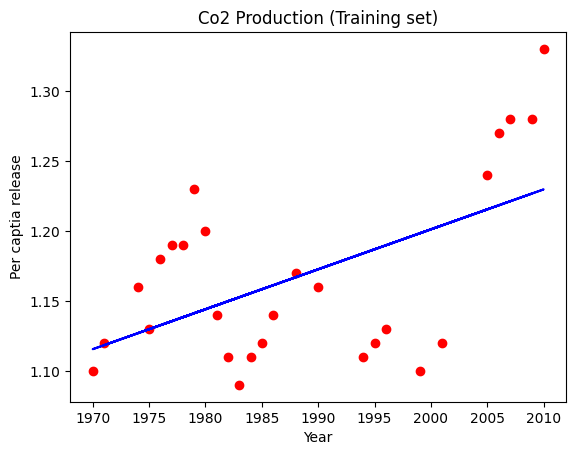

In [6]:
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title('Co2 Production (Training set)')
plt.xlabel('Year')
plt.ylabel('Per captia release')
plt.show()

# Visualising the Testing set results

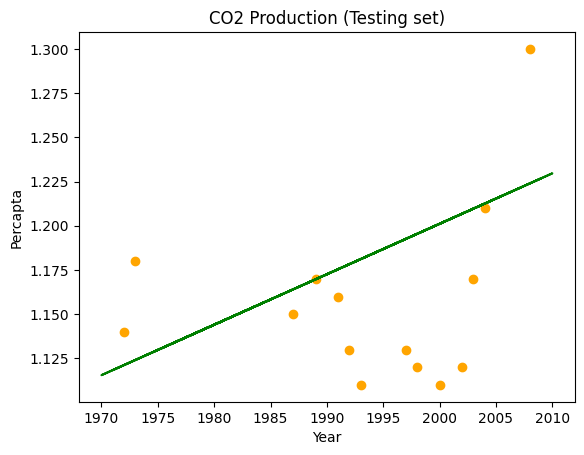

In [7]:
plt.scatter(x_test, y_test, color = 'orange')
plt.plot(x_train, regressor.predict(x_train), color = 'green')
plt.title('CO2 Production (Testing set)')
plt.xlabel('Year')
plt.ylabel('Percapta')
plt.show()

# Prediction

In [8]:
print(regressor.predict([[2013]]))

[1.23821688]


#**Model Saving**

In [9]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(regressor, open(filename, 'wb'))